# Time Series

* A time series is a sequence of observations over a certain period.
* A univariate time series consists of the values taken by a single variable at periodic time instances over a period.
* A multivariate time series consists of the values taken by multiple variables at the same periodic time instances over a period. 



### important points
* We need decent amount of data 

* short duration forecaste only, not good --> 1yr forcast 1 mnth is ok not for forecasting 4 yr

* dependency of previous data + no gap =ts

* forcasting too long in future is usually not good

* to forecast use the stable part of the series
---
In test train use most recent part for test and data is continues not random
---

### How to prepare data
* we have to do a few things to convert our data into a time series object:
1. converted the Month column from strings to datetime
2. set the transformed datetime column as the index
3. extracted year, month and weekday from the index and stored in new columns



# Key Words
* X1 X2 .....Xt-1  Xt  Xt+1
* Forcast Horizon -Number of step to forecast
### 2 ways of producing multi-step forecast
    1. Incremental method (can be done with any one step forecaster) eg ARIMA
    2. Multi-Output forecast(Limited to certain models)- ARIMA cannot do multiForecast
 
# Core Model
#### Multi step Forecast by INCREMENTAL MODEL
* y=yt, y+ yt=yt+1, y+y^t+y^t+1.....
#### Multi output Multi-step Forecast
* Yt=Yt+1,Yt+2,Yt+3,...

# Transform in TS
### like ML standard scaling and minmax we have in time series
1. Log Xform
2. Power X-form
3. Box-Cox X-form
All serve the same purpose


## A time series has 4 components as given below −

* Level − It is the mean value around which the series varies.

* Trend − It is the increasing or decreasing behavior of a variable with time.

* Seasonality − It is the cyclic behavior of time series.

* Noise − It is the error in the observations added due to environmental factors.

## Time series forecasting models
* Autoregression (AR)
* Moving Average (MA)
* Autoregressive Moving Average (ARMA)
* Autoregressive Integrated Moving Average (ARIMA)
* Seasonal Autoregressive Integrated Moving-Average (SARIMA)
* Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
* Vector Autoregression (VAR)
* Vector Autoregression Moving-Average (VARMA)
* Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
* Simple Exponential Smoothing (SES)
* Holt Winter’s Exponential Smoothing (HWES)
* LSTM in NN

## Time Series Modeling Techniques

* Naïve Methods
These are simple estimation techniques, such as the predicted value is given the value equal to mean of preceding values of the time dependent variable, or previous actual value. These are used for comparison with sophisticated modelling techniques.


* Auto Regression
Auto regression predicts the values of future time periods as a function of values at previous time periods. Predictions of auto regression may fit the data better than that of naïve methods, but it may not be able to account for seasonality.

* Moving average
Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting. Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

* ARIMA Model
An auto-regressive integrated moving-average models the value of a variable as a linear function of previous values and residual errors at previous time steps of a stationary timeseries. 
However, the real world data may be non-stationary and have seasonality, thus $Seasonal-ARIMA$ and $Fractional-ARIMA$ were developed.
$ARIMA$ works on univariate time series, to handle multiple variables $VARIMA$ was introduced.


* Exponential Smoothing
It models the value of a variable as an exponential weighted linear function of previous values. This statistical model can handle trend and seasonality as well.


* LSTM
Long Short-Term Memory model ($LSTM$) is a recurrent neural network which is used for time series to account for long term dependencies. It can be trained with large amount of data to capture the trends in multi-variate time series.


#### Seasonality
    Seasonality refers to periodic fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.
###### * if data is seasonal u have to use shift 12 , instead of one


#### Stationarity
    Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time.
   
#### Autocorrelation
    Informally, autocorrelation is the similarity between observations as a function of the time lag between them.
    
#### How to test if a process is stationary
* $Dickey-Fuller$ : This is the statistical test that we run to determine if a time series is stationary or not.
Without going into the technicalities of the Dickey-Fuller test, it test the null hypothesis that a unit root is present.
If it is, then p > 0, and the process is not stationary.
Otherwise, p = 0, the null hypothesis is rejected, and the process is considered to be stationary.

1. Time series has to be continues- 1jan 1feb 1mar is yes , 1jan 15feb 10 mar is not a TS.
2. Peak and troughs - /\   and \/
3. Trend , seasonality and pattern in seasonality itself is used togather various time.

In [ ]:
# NaN = > (Not-a-Number)

In [2]:
import pandas as pd

To date time

In [2]:
d=["2/4/2021","3.4.2021","5-4-2021","2021/2/4"]
dt=["2/4/2021 2:30:00 pm","3.4.2021 14:30:00","5-4-2021 11:10:00","2021/2/4"]

In [3]:
pd.to_datetime(d)

DatetimeIndex(['2021-02-04', '2021-03-04', '2021-05-04', '2021-02-04'], dtype='datetime64[ns]', freq=None)

In [4]:
pd.to_datetime(dt)# .dt.date

DatetimeIndex(['2021-02-04 14:30:00', '2021-03-04 14:30:00',
               '2021-05-04 11:10:00', '2021-02-04 00:00:00'],
              dtype='datetime64[ns]', freq=None)

* all converted to a common type

In [5]:
# dd-mm-yy or mm-dd-yr
pd.to_datetime("3-5-2021")

Timestamp('2021-03-05 00:00:00')

In [6]:
pd.to_datetime("3-5-2021",dayfirst=True)

Timestamp('2021-05-03 00:00:00')

#### FORMAT

In [7]:
pd.to_datetime("3#5#2021",format="%d#%m#%Y")

Timestamp('2021-05-03 00:00:00')

In [11]:
pd.to_datetime(["3-5-2021","4-5-2021","abcdef"]) # ignore req


ParserError: Unknown string format: abcdef

In [12]:
pd.to_datetime(["3-5-2021","4-5-2021","abcdef"],errors="ignore")

Index(['3-5-2021', '4-5-2021', 'abcdef'], dtype='object')

### Ignoring errors above


Reading data set

In [4]:
df=pd.read_csv("gold data.csv")
df.head()

,Week,gold: (United States)
0,15-03-2020,79
1,22-03-2020,79
2,29-03-2020,72
3,05-04-2020,75
4,12-04-2020,77


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Week                   51 non-null     object
 1   gold: (United States)  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 948.0+ bytes


In [183]:
df.describe()

,gold: (United States)
count,51.000000
mean,82.411765
std,6.456552
min,63.000000
25%,78.500000
50%,81.000000
75%,86.000000
max,100.000000


In [7]:
df["Week"].dtype

dtype('O')

In [9]:
type(df["Week"][0])

str

### data format is in str type
 * Using date_parser

In [7]:
import pandas as pd

In [8]:
pd.__version__

'2.2.3'

In [9]:

data=pd.read_csv("gold data.csv",parse_dates=["Week"])
data.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_36396\2344016690.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data=pd.read_csv("gold data.csv",parse_dates=["Week"])


,Week,gold: (United States)
0,2020-03-15,79
1,2020-03-22,79
2,2020-03-29,72
3,2020-04-05,75
4,2020-04-12,77


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Week                   51 non-null     datetime64[ns]
 1   gold: (United States)  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 948.0 bytes


In [11]:
data["Week"].dtype

dtype('<M8[ns]')

In [12]:
type(data["Week"][0])

pandas._libs.tslibs.timestamps.Timestamp

## Making index col == date

In [16]:
import pandas as pd
dat=pd.read_csv("gold data.csv",parse_dates=["Week"],index_col="Week",sep=',')
dat.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_36396\3346734466.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dat=pd.read_csv("gold data.csv",parse_dates=["Week"],index_col="Week",sep=',')


,gold: (United States)
Week,
2020-03-15,79
2020-03-22,79
2020-03-29,72
2020-04-05,75
2020-04-12,77


In [23]:
dat.columns=['gold']

In [18]:
dat.index

DatetimeIndex(['2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26',
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18',
               '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15',
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07',
               '2021-02-14', '2021-02-21', '2021-02-28'],
              dtype='datetime64[ns]', name='Week', freq=None)

In [17]:
dat.head()

,gold: (United States)
Week,
2020-03-15,79
2020-03-22,79
2020-03-29,72
2020-04-05,75
2020-04-12,77


In [18]:
type(dat)

pandas.core.frame.DataFrame

## to fetch a particular month


In [19]:
dat.loc["2020-03"]

,gold: (United States)
Week,
2020-03-15,79
2020-03-22,79
2020-03-29,72


In [20]:
dat.loc["2020-04"]

,gold: (United States)
Week,
2020-04-05,75
2020-04-12,77
2020-04-19,83
2020-04-26,81


## To fetch a range

In [21]:
dat.loc["2020-03":"2020-04"]

,gold: (United States)
Week,
2020-03-15,79
2020-03-22,79
2020-03-29,72
2020-04-05,75
2020-04-12,77
2020-04-19,83
2020-04-26,81


# Reshaping

In [26]:
#all frequency offsets except for 'ME', 'YE', 'QE', 'BME','BA', 'BQE', and 'W' which all have a default of 'right'
dat.gold.resample("D").mean()#day
# this will work when u have multiple entry on single day

Week
2020-03-15    79.0
2020-03-16     NaN
2020-03-17     NaN
2020-03-18     NaN
2020-03-19     NaN
              ... 
2021-02-24     NaN
2021-02-25     NaN
2021-02-26     NaN
2021-02-27     NaN
2021-02-28    86.0
Freq: D, Name: gold, Length: 351, dtype: float64

In [27]:
dat.gold.resample("W").mean()#weekly

Week
2020-03-15     79.0
2020-03-22     79.0
2020-03-29     72.0
2020-04-05     75.0
2020-04-12     77.0
2020-04-19     83.0
2020-04-26     81.0
2020-05-03     77.0
2020-05-10     83.0
2020-05-17     81.0
2020-05-24     78.0
2020-05-31     74.0
2020-06-07     80.0
2020-06-14     82.0
2020-06-21     78.0
2020-06-28     82.0
2020-07-05     81.0
2020-07-12     81.0
2020-07-19     91.0
2020-07-26    100.0
2020-08-02     98.0
2020-08-09     94.0
2020-08-16     88.0
2020-08-23     81.0
2020-08-30     80.0
2020-09-06     79.0
2020-09-13     76.0
2020-09-20     78.0
2020-09-27     78.0
2020-10-04     77.0
2020-10-11     78.0
2020-10-18     80.0
2020-10-25     79.0
2020-11-01     63.0
2020-11-08     83.0
2020-11-15     84.0
2020-11-22     87.0
2020-11-29     94.0
2020-12-06     86.0
2020-12-13     86.0
2020-12-20     87.0
2020-12-27     87.0
2021-01-03     83.0
2021-01-10     86.0
2021-01-17     87.0
2021-01-24     85.0
2021-01-31     92.0
2021-02-07     84.0
2021-02-14     80.0
2021-02-21     

In [28]:
dat.gold.resample("B").mean()#weekly

Week
2020-03-13    79.0
2020-03-16     NaN
2020-03-17     NaN
2020-03-18     NaN
2020-03-19     NaN
              ... 
2021-02-22     NaN
2021-02-23     NaN
2021-02-24     NaN
2021-02-25     NaN
2021-02-26    86.0
Freq: B, Name: gold, Length: 251, dtype: float64

In [30]:
dat.gold.resample("ME").mean()#month 'ME'

Week
2020-03-31    76.666667
2020-04-30    79.000000
2020-05-31    78.600000
2020-06-30    80.500000
2020-07-31    88.250000
2020-08-31    88.200000
2020-09-30    77.750000
2020-10-31    78.500000
2020-11-30    82.200000
2020-12-31    86.500000
2021-01-31    86.600000
2021-02-28    83.250000
Freq: ME, Name: gold, dtype: float64

In [31]:
dat.gold.resample("YE").mean()#year YE

Week
2020-12-31    81.833333
2021-12-31    85.111111
Freq: YE-DEC, Name: gold, dtype: float64

In [32]:
dat.gold.resample("QE").mean()#quater

Week
2020-03-31    76.666667
2020-06-30    79.307692
2020-09-30    85.000000
2020-12-31    82.384615
2021-03-31    85.111111
Freq: QE-DEC, Name: gold, dtype: float64

In [33]:
list(dat.gold.resample("QE"))

[(Timestamp('2020-03-31 00:00:00'),
  Week
  2020-03-15    79
  2020-03-22    79
  2020-03-29    72
  Name: gold, dtype: int64),
 (Timestamp('2020-06-30 00:00:00'),
  Week
  2020-04-05    75
  2020-04-12    77
  2020-04-19    83
  2020-04-26    81
  2020-05-03    77
  2020-05-10    83
  2020-05-17    81
  2020-05-24    78
  2020-05-31    74
  2020-06-07    80
  2020-06-14    82
  2020-06-21    78
  2020-06-28    82
  Name: gold, dtype: int64),
 (Timestamp('2020-09-30 00:00:00'),
  Week
  2020-07-05     81
  2020-07-12     81
  2020-07-19     91
  2020-07-26    100
  2020-08-02     98
  2020-08-09     94
  2020-08-16     88
  2020-08-23     81
  2020-08-30     80
  2020-09-06     79
  2020-09-13     76
  2020-09-20     78
  2020-09-27     78
  Name: gold, dtype: int64),
 (Timestamp('2020-12-31 00:00:00'),
  Week
  2020-10-04    77
  2020-10-11    78
  2020-10-18    80
  2020-10-25    79
  2020-11-01    63
  2020-11-08    83
  2020-11-15    84
  2020-11-22    87
  2020-11-29    94
  2020

# Plot

In [13]:
type(dat.sort_index())

pandas.core.frame.DataFrame

In [130]:
dat_sort=dat.sort_index()
dat_sort.head()

,gold
Week,
2020-01-11,63
2020-02-08,98
2020-03-05,77
2020-03-15,79
2020-03-22,79


In [134]:
dat_sort.gold.resample("M").mean()

Week
2020-01-31    63.000000
2020-02-29    98.000000
2020-03-31    76.750000
2020-04-30    80.333333
2020-05-31    77.800000
2020-06-30    81.400000
2020-07-31    90.333333
2020-08-31    83.000000
2020-09-30    81.500000
2020-10-31    80.666667
2020-11-30    85.750000
2020-12-31    83.600000
2021-01-31    88.000000
2021-02-28    83.000000
2021-03-31    83.000000
2021-04-30          NaN
2021-05-31          NaN
2021-06-30          NaN
2021-07-31    84.000000
2021-08-31          NaN
2021-09-30          NaN
2021-10-31    86.000000
Freq: M, Name: gold, dtype: float64

<AxesSubplot:xlabel='Week'>

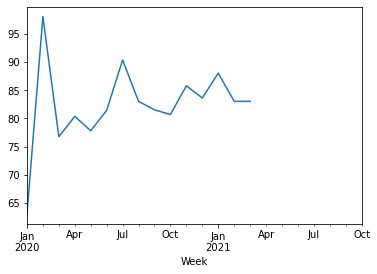

In [135]:
dat_sort.gold.resample("M").mean().plot()

<AxesSubplot:ylabel='Week'>

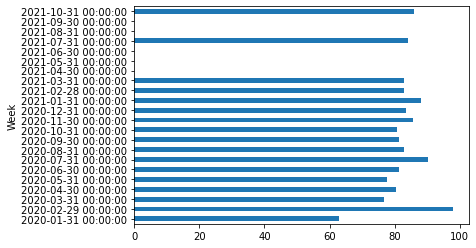

In [137]:
dat_sort.gold.resample("M").mean().plot(kind="barh")

# Date range

In [152]:
date=pd.date_range(start="1/1/2020",end="12/31/2020",freq="B")
date

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=262, freq='B')

In [151]:
len(date)

262

In [ ]:
# periods=8

In [156]:
date=pd.date_range(start="1/1/2020",end="12/31/2020",periods=10)
date
#ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified


DatetimeIndex(['2020-01-01 00:00:00', '2020-02-10 13:20:00',
               '2020-03-22 02:40:00', '2020-05-01 16:00:00',
               '2020-06-11 05:20:00', '2020-07-21 18:40:00',
               '2020-08-31 08:00:00', '2020-10-10 21:20:00',
               '2020-11-20 10:40:00', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [165]:
pd_dd=pd.DataFrame([3,4,5,6],columns=["value"])
pd_dd

,value
0,3
1,4
2,5
3,6


In [163]:
d=pd.date_range(start="1/1/2020",periods=4)
d

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04'], dtype='datetime64[ns]', freq='D')

In [166]:
pd_dd.set_index(d)

,value
2020-01-01,3
2020-01-02,4
2020-01-03,5
2020-01-04,6


In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

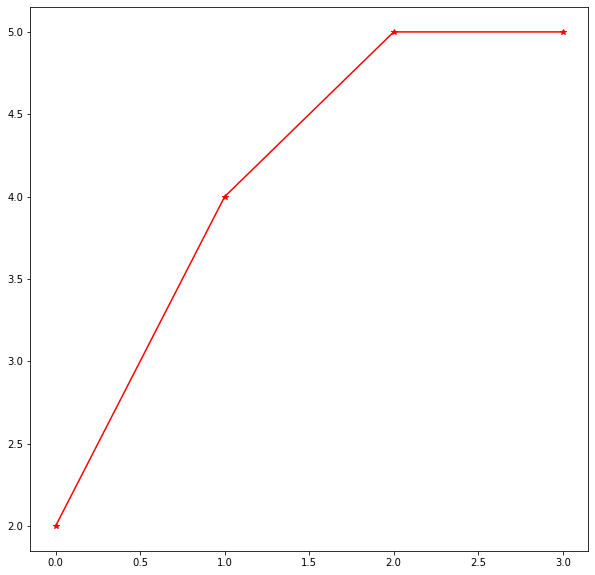

In [196]:
plt.subplots(1,1,figsize=(10,10))
plt.plot([2,4,5,5],"r-*")




In [217]:
df.asfreq("d")

,Week,gold: (United States)
1970-01-01,NaN,NaN


*  ar
*  ma
*  arma
*  arima
*  armax
*  arimax
*  sarimax
*  
*  Volatility
*  arch model
*  garch  generalization
*  
*  Frequency - how often data has been recorded 
*  time series required a start and the end point
*  
*  time= t-1,t,t+1
*  
*  Intervales need to be identical, if its not there its due to some missing values and we have to handle these 
*  values
*  while handeling null we have to mind that ts need cronological order (sequence)

#### White Noise

### Period 

In [13]:
import pandas as pd
pd.Period("2021")  # annual ending in dec

Period('2021', 'A-DEC')

In [15]:
y=pd.Period("2021")
dir(y)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_delta',
 '_add_offset',
 '_dtype',
 '_from_ordinal',
 '_get_to_timestamp_base',
 '_maybe_convert_freq',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [18]:
y.weekofyear

52

In [19]:
y.dayofweek

4

In [22]:
help(pd.Period.dayofweek)

Help on getset descriptor pandas._libs.tslibs.period._Period.dayofweek:

dayofweek
    Day of the week the period lies in, with Monday=0 and Sunday=6.
    
    If the period frequency is lower than daily (e.g. hourly), and the
    period spans over multiple days, the day at the start of the period is
    used.
    
    If the frequency is higher than daily (e.g. monthly), the last day
    of the period is used.
    
    Returns
    -------
    int
        Day of the week.
    
    See Also
    --------
    Period.dayofweek : Day of the week the period lies in.
    Period.weekday : Alias of Period.dayofweek.
    Period.day : Day of the month.
    Period.dayofyear : Day of the year.
    
    Examples
    --------
    >>> per = pd.Period('2017-12-31 22:00', 'H')
    >>> per.dayofweek
    6
    
    For periods that span over multiple days, the day at the beginning of
    the period is returned.
    
    >>> per = pd.Period('2017-12-31 22:00', '4H')
    >>> per.dayofweek
    6
    >>> per.

In [29]:
y.start_time

Timestamp('2021-01-01 00:00:00')

In [30]:
y.end_time

Timestamp('2021-12-31 23:59:59.999999999')

### Month wise time period

In [25]:
m=pd.Period("2021-1",freq="M")
m

Period('2021-01', 'M')

In [26]:
m.start_time

Timestamp('2021-01-01 00:00:00')

In [27]:
m.end_time

Timestamp('2021-01-31 23:59:59.999999999')

In [32]:
m+1

Period('2021-02', 'M')

In [33]:
m+3

Period('2021-04', 'M')

In [34]:
d=pd.Period("2016-02-28","D")

In [36]:
d.start_time

Timestamp('2016-02-28 00:00:00')

In [37]:
d.end_time

Timestamp('2016-02-28 23:59:59.999999999')

In [38]:
d+1  # because its a leap year

Period('2016-02-29', 'D')

In [39]:
d+2

Period('2016-03-01', 'D')

# SHIFT and TShift


In [6]:
dat.head(10)

,gold: (United States)
Week,
2020-03-15,79
2020-03-22,79
2020-03-29,72
2020-05-04,75
2020-12-04,77
2020-04-19,83
2020-04-26,81
2020-03-05,77
2020-10-05,83


In [9]:
dat.columns

Index(['gold: (United States)', 'shift by 2'], dtype='object')

In [10]:
dat["shift by 2"]=dat['gold: (United States)'].shift(2)
dat["shift by -1"]=dat['gold: (United States)'].shift(-1)
dat

,gold: (United States),shift by 2,shift by -1
Week,,,
2020-03-15,79,NaN,79.0
2020-03-22,79,NaN,72.0
2020-03-29,72,79.0,75.0
2020-05-04,75,79.0,77.0
2020-12-04,77,72.0,83.0
2020-04-19,83,75.0,81.0
2020-04-26,81,77.0,77.0
2020-03-05,77,83.0,83.0
2020-10-05,83,81.0,81.0


In [ ]:
## dat["tshift by 2"]=dat.tshift(2,freq="B")
#dat["tshift by -1"]=dat['gold: (United States)'].tshift(-1)
dat

END
==
BASIC
--

# -------------------------------------------------------------ST

### cheat sheet - for students**
https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/